In [ ]:
#  * @author [Krutarth (Kay) Parmar]
#  * @email [thisiskay@kayparmar.com]
#  * @create date 2024-05-10 14:46:42
#  * @desc [Program to create a song recommendation system]


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("rolling_stones_spotify.csv")
df=df.drop_duplicates()
print(df.count())

Unnamed: 0          1610
name                1610
album               1610
release_date        1610
track_number        1610
id                  1610
uri                 1610
acousticness        1610
danceability        1610
energy              1610
instrumentalness    1610
liveness            1610
loudness            1610
speechiness         1610
tempo               1610
valence             1610
popularity          1610
duration_ms         1610
dtype: int64


In [4]:
print("\n missing values: ")
print(df.isnull().sum())
#no missing values but still performing a removal
df=df.dropna()


 missing values: 
Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64


In [5]:
#recommend based on popular songs
avg_popularity_per_album=df.groupby('album')['popularity'].mean()
top_albums=avg_popularity_per_album.nlargest(3)
print("\n the top 3 albums based on popularity: ")
print(top_albums)


 the top 3 albums based on popularity: 
album
Sticky Fingers (Remastered)      53.300000
Some Girls                       48.100000
Tattoo You (2009 Re-Mastered)    46.454545
Name: popularity, dtype: float64


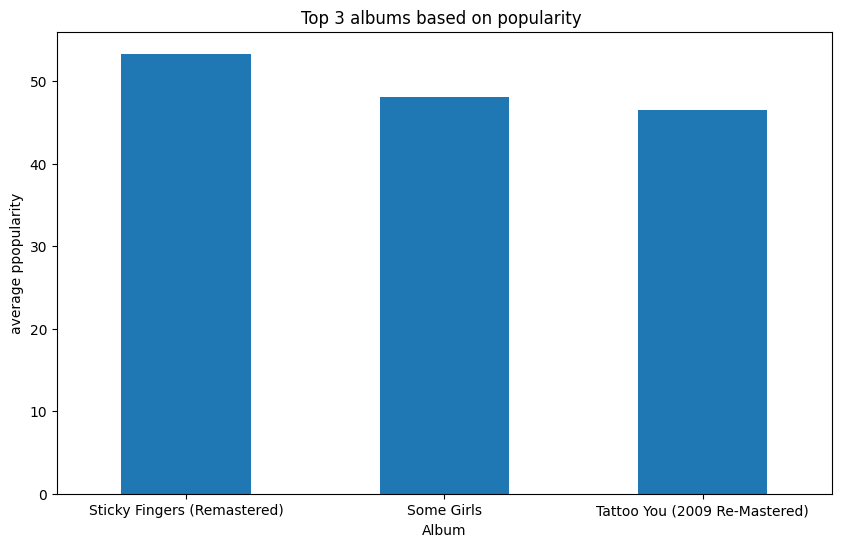

In [6]:
plt.figure(figsize=(10,6))
top_albums.plot(kind='bar',xlabel='Album',ylabel='average ppopularity', title='Top 3 albums based on popularity ')
plt.xticks(rotation=0)
# plt.tight_layout()
plt.show()

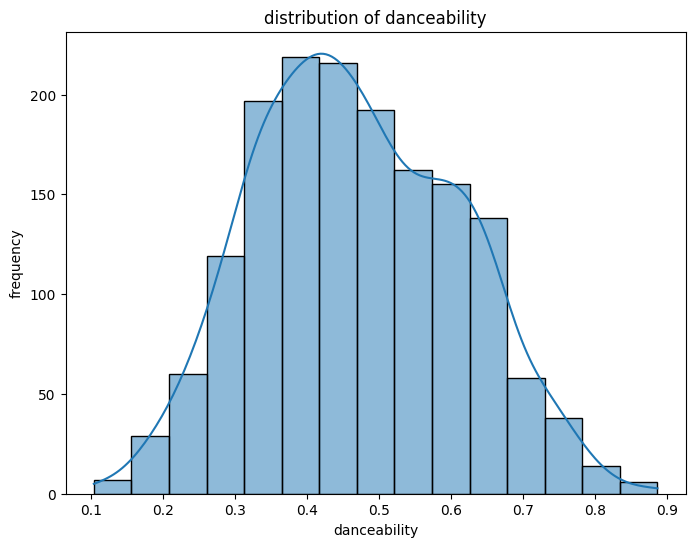

In [7]:
#Exploratory Data Analysis (EDA)
#distribution of danceability
plt.figure(figsize=(8,6))
sns.histplot(df['danceability'],bins=15,kde=True)
plt.xlabel('danceability')
plt.ylabel('frequency')
plt.title('distribution of danceability')
plt.show()

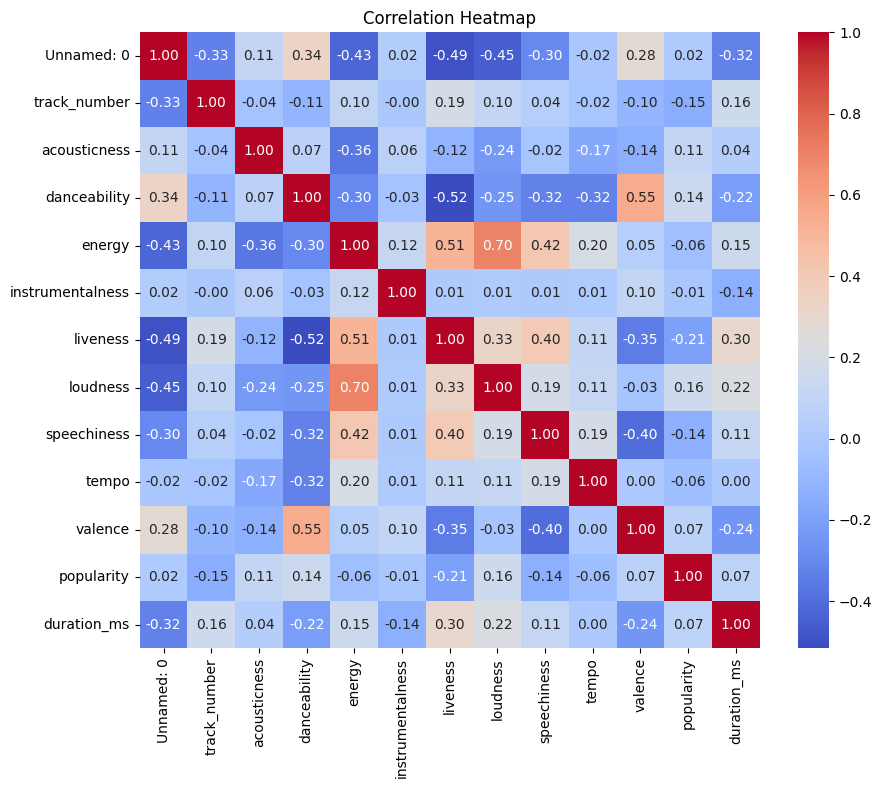

In [9]:
numeric_df=df.select_dtypes(include=[float,int])
correlation_matrix=numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

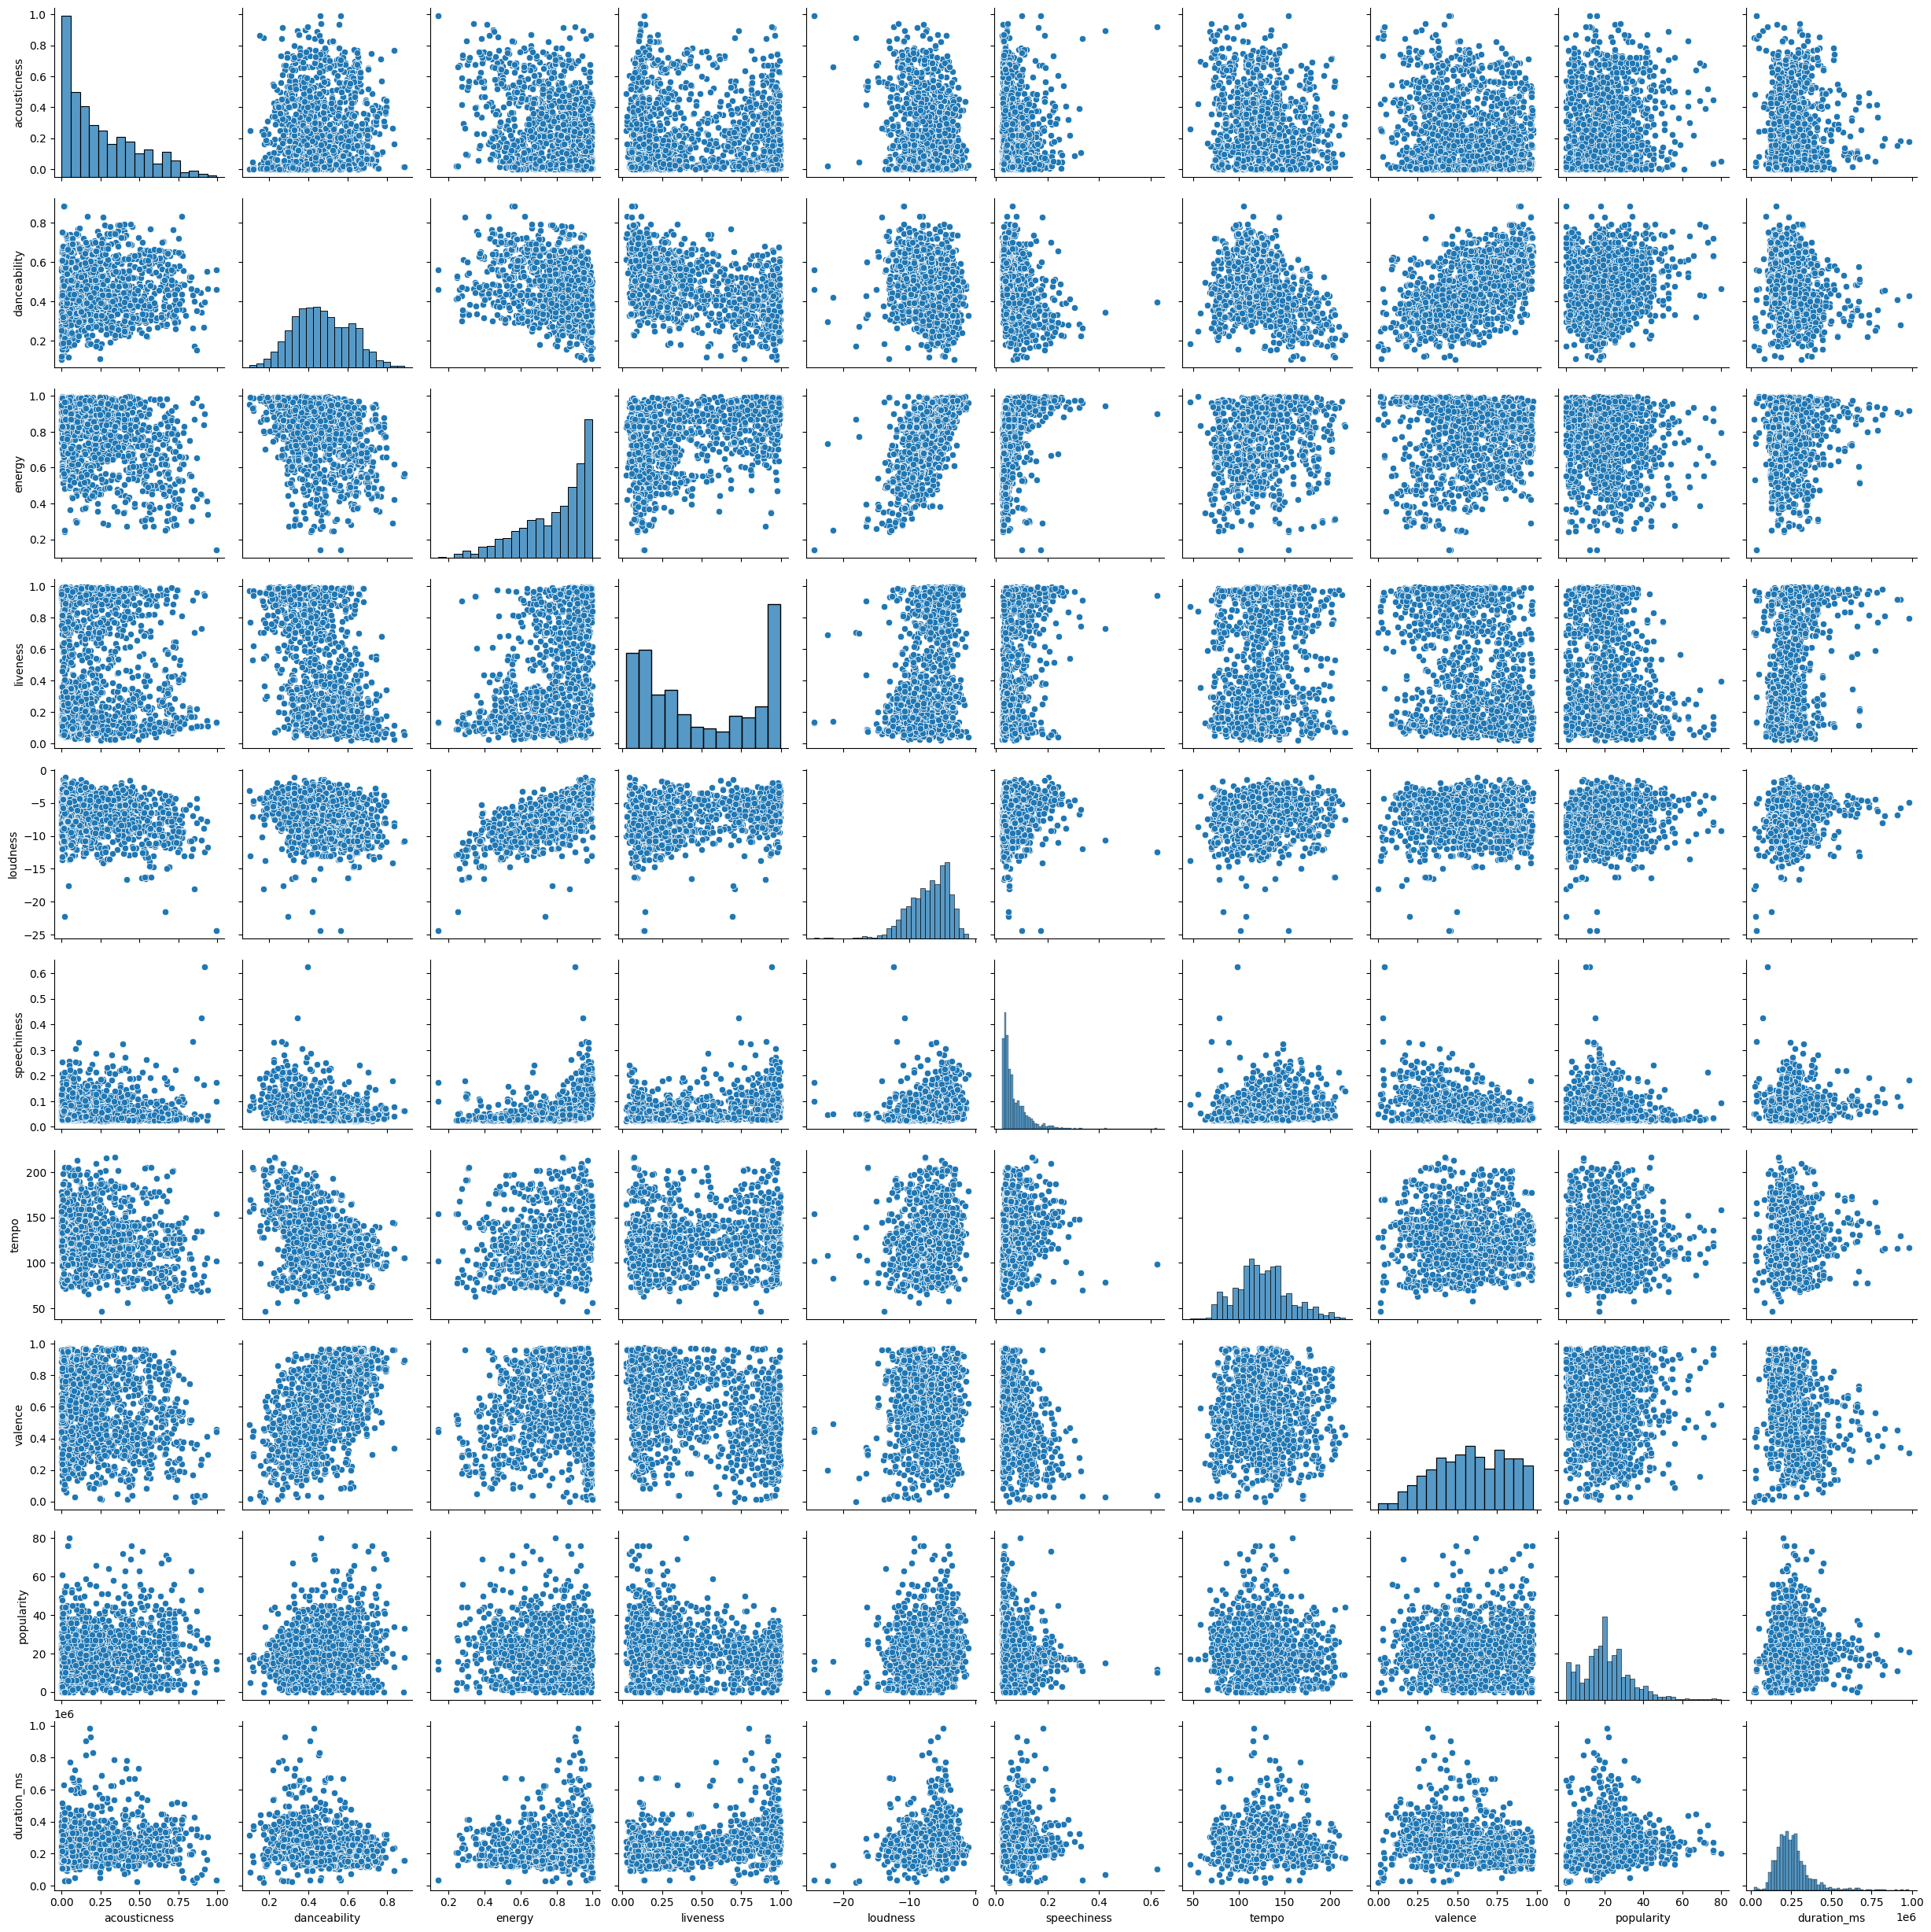

In [14]:
import seaborn as sns

eda_data=df[['acousticness','danceability','energy','liveness','loudness','speechiness','tempo','valence','popularity','duration_ms']]
sns.pairplot(eda_data)
plt.show()


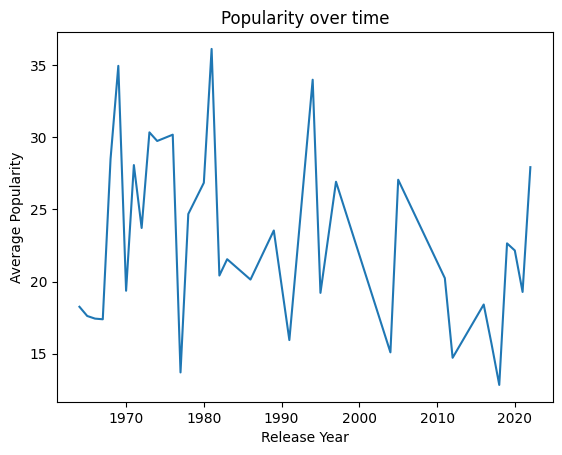

In [15]:
# Convert the release_date column to a datetime object
df['release_date'] = pd.to_datetime(df['release_date'])
# Extract the year from the release_date
df['release_year'] = df['release_date'].dt.year
# Group data by release year and calculate the average popularity
popularity_over_time = df.groupby('release_year')['popularity'].mean()
# Line plot for popularity over time
popularity_over_time.plot(kind='line', xlabel='Release Year', ylabel='Average Popularity', title="Popularity over time")
plt.show()

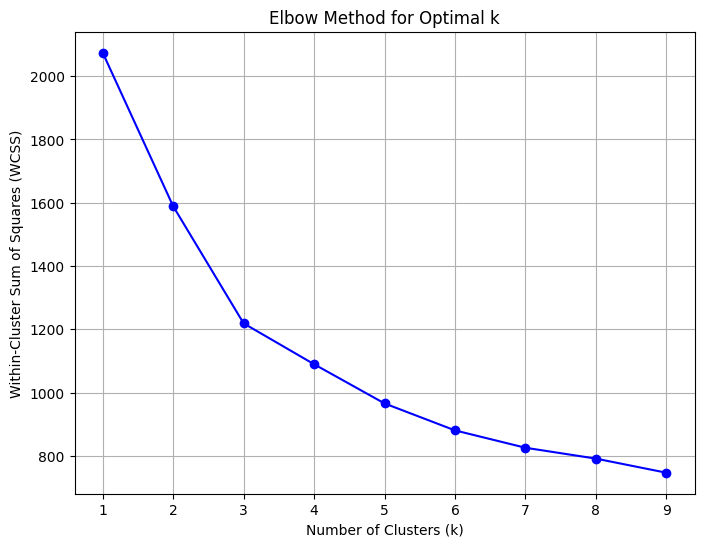

Optimal number of clusters (k): 2


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select relevant features
selected_features = numeric_df[['acousticness', 'danceability']]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(selected_features)

# Initialize variables
k_values = range(1, 10)
wcss_values = []
max_iters = 100

# Perform K-means clustering for different values of k
for k in k_values:
    np.random.seed(0)  # Ensure reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for iteration in range(max_iters):
        # Calculate distances and assign labels
        distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2))
        labels = np.argmin(distances, axis=1)
        
        # Calculate new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    # Calculate WCSS
    wcss = np.sum(np.min(distances, axis=1))
    wcss_values.append(wcss)

# Plot the WCSS values for each k
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Find the optimal value of k (elbow method)
optimal_k = np.argmin(np.diff(wcss_values)) + 2
print(f"Optimal number of clusters (k): {optimal_k}")


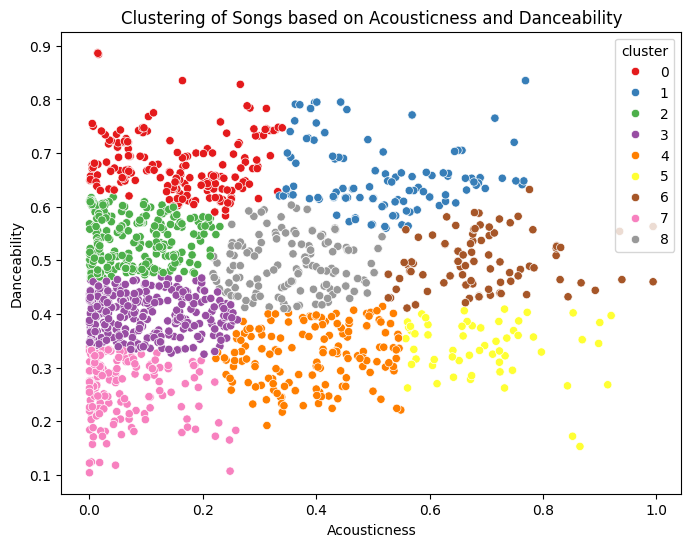

In [26]:
# Add cluster labels to the original dataset
numeric_df['cluster'] = labels
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='acousticness', y='danceability', hue='cluster', data=numeric_df, palette='Set1')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.title('Clustering of Songs based on Acousticness and Danceability')
plt.show()

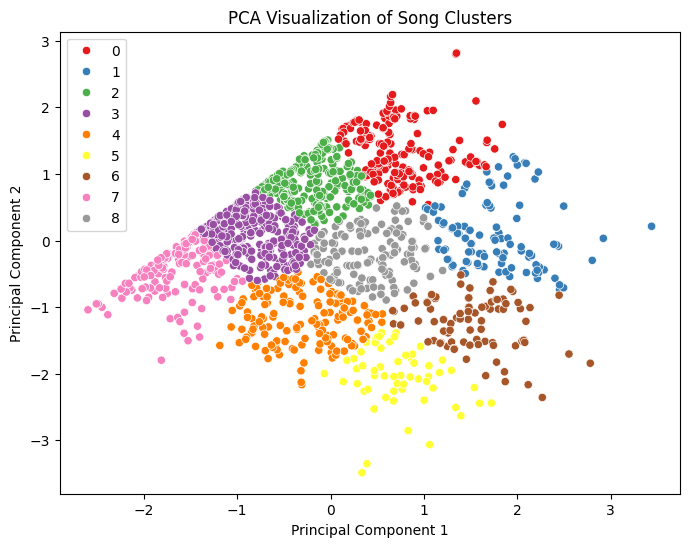

In [27]:
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X)

# Visualize the data after dimensionality reduction
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=labels, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Song Clusters')
plt.show()
